https://youtu.be/7mi6cJSTj6Y?si=4FmMOlxItoU4hSu7

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
players_df = pd.read_csv("data/players.csv")

In [8]:
players_df

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [9]:
players_df["height_inches"] = players_df["height"].apply( lambda x: int(x.split("-")[0])*12 + int(x.split("-")[1]) if len(x.split("-"))==2 else int(x))

In [10]:
players_df

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


In [11]:
players_df["height_inches"].mean()

74.0106149341142

In [12]:
players_df.sample(10)["height_inches"].mean()

75.0

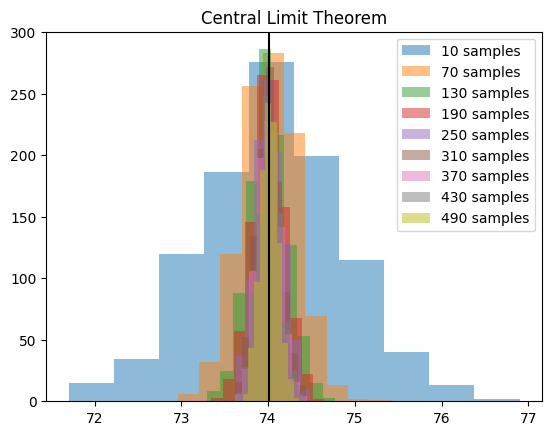

In [13]:
sample_amounts = range(10, 500, 60)

for x in sample_amounts:
    samples = []
    for i in range(1000):
        samples.append(players_df.sample(x)["height_inches"].mean())
    plt.hist(samples, alpha=0.5)
plt.legend([f"{z} samples" for z in sample_amounts])
plt.title("Central Limit Theorem")
plt.axvline(x=players_df["height_inches"].mean(), c="k")

In [14]:
players_df["height_inches"].sem()

0.05065243293253027

https://youtu.be/TqOeMYtOc1w?si=Wythg-FyVLp_stK9

## The Bootstrap

- The bootstrap is a sampling procedure to draw additional samples from a given sample.
- The procedure does not necessarily involve any assumptions about the data or the sample statistic being normally distributed.
- Suppose you have a sample from a population. You don't have the population. You can calculate a sample statistic, eg sample mean. You want to figure out just from this sample what statistic values would be reasonable for the whole population. We caan bootstrap the given sample. Bootstrap procedure:
    - From this sample of size $n$, randomly select $n$ values, with replacement.
    - Calculate the sample statistic.
    - Repeat the last two steps many (>10k) times.


In [15]:
from sklearn.utils import resample

In [16]:
resample?

Signature:
resample(
    *arrays,
    replace=True,
    n_samples=None,
    random_state=None,
    stratify=None,
)
Docstring:
Resample arrays or sparse matrices in a consistent way.

The default strategy implements one step of the bootstrapping
procedure.

Parameters
----------
*arrays : sequence of array-like of shape (n_samples,) or             (n_samples, n_outputs)
    Indexable data-structures can be arrays, lists, dataframes or scipy
    sparse matrices with consistent first dimension.

replace : bool, default=True
    Implements resampling with replacement. If False, this will implement
    (sliced) random permutations.

n_samples : int, default=None
    Number of samples to generate. If left to None this is
    automatically set to the first dimension of the arrays.
    If replace is False it should not be larger than the length of
    arrays.

random_state : int, RandomState instance or None, default=None
    Determines random number generation for shuffling
    the data.
   

In [43]:
players_df["height_inches"].mean()

74.0106149341142

In [45]:
results = []
for nrepeat in range(10000):
    sample = resample(players_df["height_inches"])
    results.append(sample.mean())
np.mean(results)
print(np.mean(results))
print(players_df["height_inches"].mean() - np.mean(results))

74.01014377745243
0.00047115666177433013


## Confidence Intervals

- Frequency tables, histograms, boxplots, standard errors, are a way to understand the potential error in a sample estimate. Confidence intervals are another.

- Suppose you have a lot of sample statistic values from a set of bootstrapped samples. Suppose the sample statistic here is the mean.
- A 95% confidence interval is just an interval that covers 95% of the means calculated by bootstrapping the sample.
- Why are confidence intervals useful?
    - Because confidence intervals are statistical tests performed visually.
    - The confidence interval covers 95% of the means, so we know that anything outside of it occurs less than 5% of the time.
    - I.e. the p-value of anything outside the confidence interval is <0.05, and thus is significantly different from the true statistic.

- Suppose we want to compare two samples (e.g. weight of female mice and wight of male mice).
- Do bootstrapping on both samples, and find the means of the bootstrapped samples.
- If the 95% confidence intervals of the two bootstrapped means don't overlap, that means there is statistically significant difference between the weights of female and male mice.
- If the 95% confidence intervals of the two bootstrapped means overlap, that means there is still a chance that the means are significantly different from each other, and we can perform the t-test to be sure.

- Confidence intervals are a great way of determining if more data needs to be calculated or if more research needs to be done into the phenomenon.
- If the bounds of the interval are too far apart, then it can be a sign that not enough data was gathered. A large confidence interval can also signal a more variable dataset.

https://www.statology.org/confidence-intervals-python/

- Confidence interval for the mean is a range of values that is likely to contain a population mean with a certain level of confidence.

- When working with a small sample (n<30), we can assume that the sampling distribution of the sample mean is t-distributed.

In [47]:
import scipy.stats as st

In [50]:
# define sample data:
data = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]

In [52]:
st.sem?

Signature: st.sem(a, axis=0, ddof=1, nan_policy='propagate', *, keepdims=False)
Docstring:
Compute standard error of the mean.

Calculate the standard error of the mean (or standard error of
measurement) of the values in the input array.

Parameters
----------
a : array_like
    An array containing the values for which the standard error is
    returned.
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
ddof : int, optional
    Delta degrees-of-freedom. How many degrees of freedom to adjust
    for bias in limited samples relative to the population estimate
    of variance. Defaults to 1.
nan_policy : {'propagate', 'omit', 'raise'}
    Defines how to handle input NaNs.
    
    - ``propagate``: if a NaN is present in the axis slice (e.g. ro

In [57]:
# create 95% confidence interval for population mean weight:
st.t.interval(confidence=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(16.75776979778498, 24.042230202215016)

- When working with larger samples (n>=30), we can assume that the sampling distribution of the sample mean is normally distributed.

In [58]:
#define sample data
np.random.seed(0)
data = np.random.randint(10, 30, 50)
data

array([22, 25, 10, 13, 13, 17, 19, 29, 28, 14, 16, 22, 11, 16, 17, 24, 27,
       15, 23, 18, 19, 29, 26, 29, 15, 25, 25, 10, 28, 13, 27, 29, 29, 29,
       24, 17, 10, 11, 19, 10, 20, 13, 21, 28, 12, 10, 10, 14, 15, 16])

In [59]:
#create 95% confidence interval for population mean weight
st.norm.interval(confidence=0.95, loc=np.mean(data), scale=st.sem(data))

(17.400060940568054, 21.079939059431943)

How to Interpret Confidence Intervals:
- Suppose our 95% confidence interval for the true population mean is: (16.758, 24.042)
- Interpretation: There is a 95% chance that the confidence interval of [16.758, 24.042] contains the true population mean.

## Normal Distribution

## Long-tailed Distribution

## Student's t-Distribution

## Binomial Distribution

## Chi-squared Distribution

## F-Distribution

## Poisson and Related Distributions